In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from pandas_profiling import ProfileReport
from sklearn.impute import KNNImputer

In [2]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

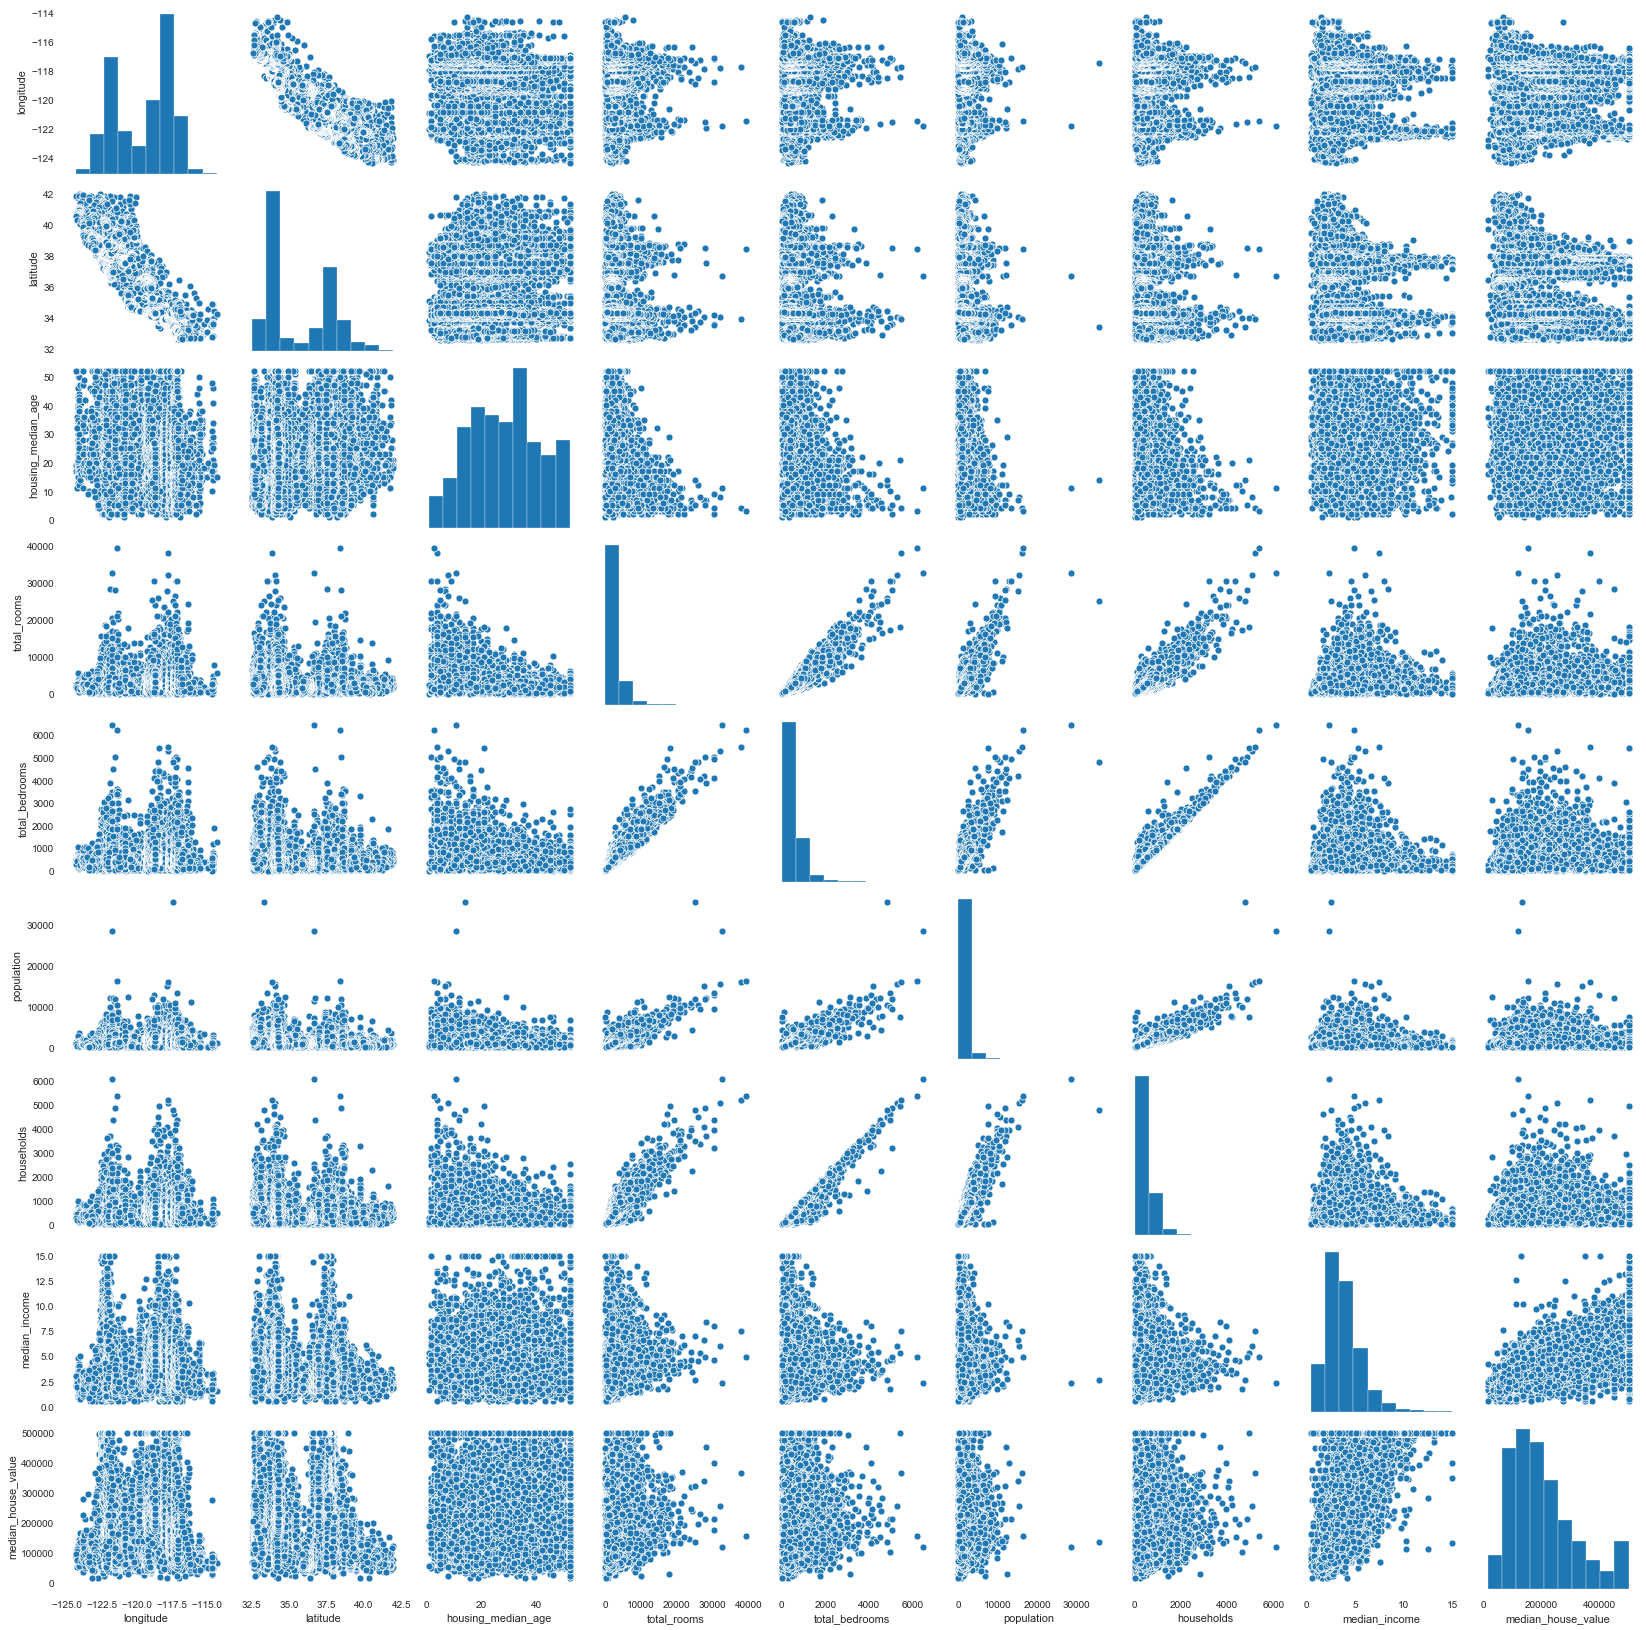

In [5]:
sns.pairplot(data)

In [6]:
# ProfileReport(data)

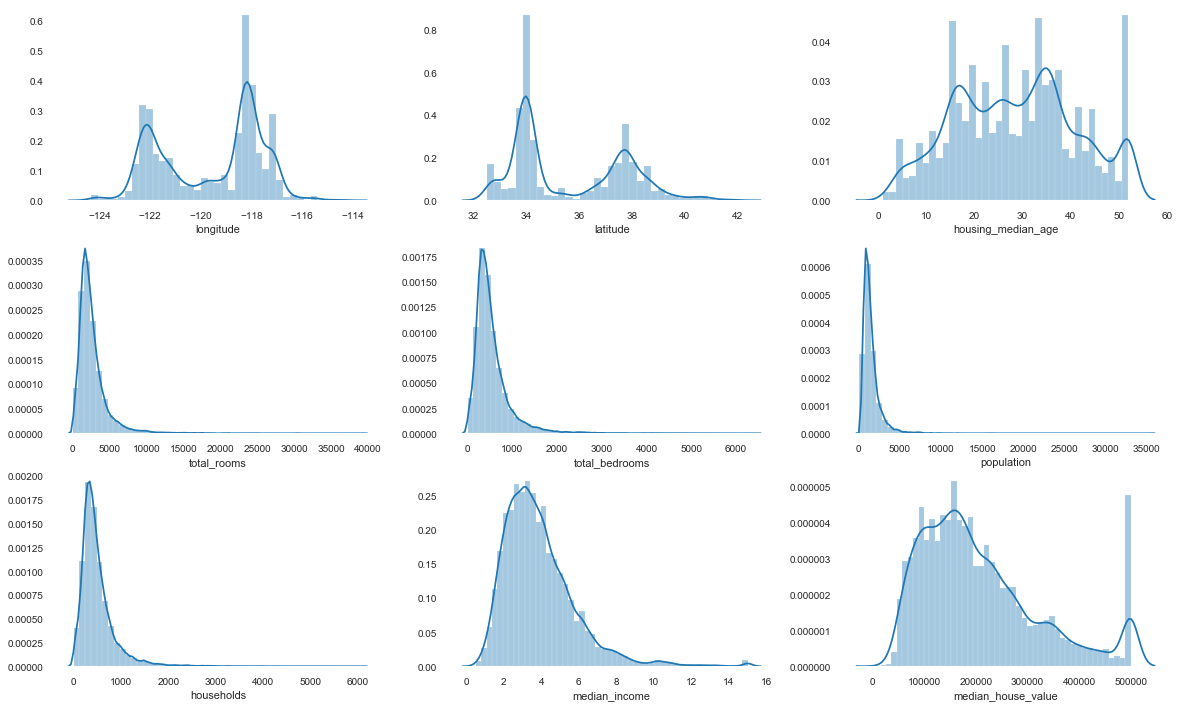

In [7]:
# data_cpy = data.copy()
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.iloc[:,:9].columns:
    plt.subplot(6, 3, j+1)
    j += 1
    sns.distplot(data[i])

In [8]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
#impute missing  values
imputer = KNNImputer(n_neighbors=3)

In [10]:
result = imputer.fit_transform(pd.DataFrame(data['total_bedrooms']))

In [11]:
result = pd.DataFrame(result)

In [12]:
data['total_bedrooms'] = result[0]

In [13]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

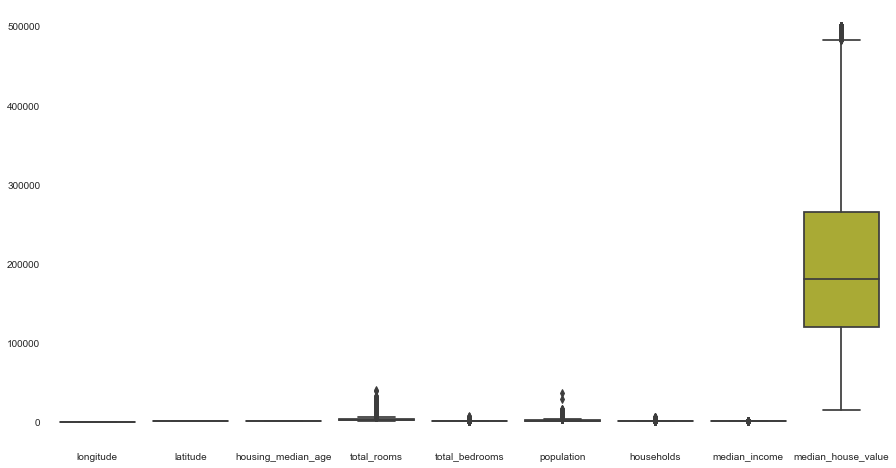

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(data=pd.DataFrame(data))

In [15]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [18]:
q = data['median_house_value'].quantile(0.95)

In [19]:
q

489809.9999999998

In [20]:
data_cpy = data.copy()


In [21]:
data_cpy[data_cpy['median_house_value']<q].shape

(19608, 10)

In [22]:
data_cpy = data_cpy[data_cpy['median_house_value'] < q]

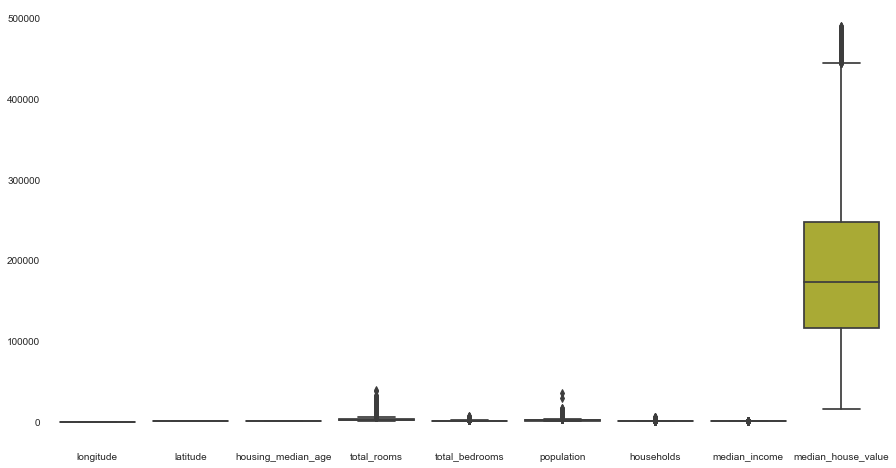

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(data=pd.DataFrame(data_cpy))

In [24]:
# data

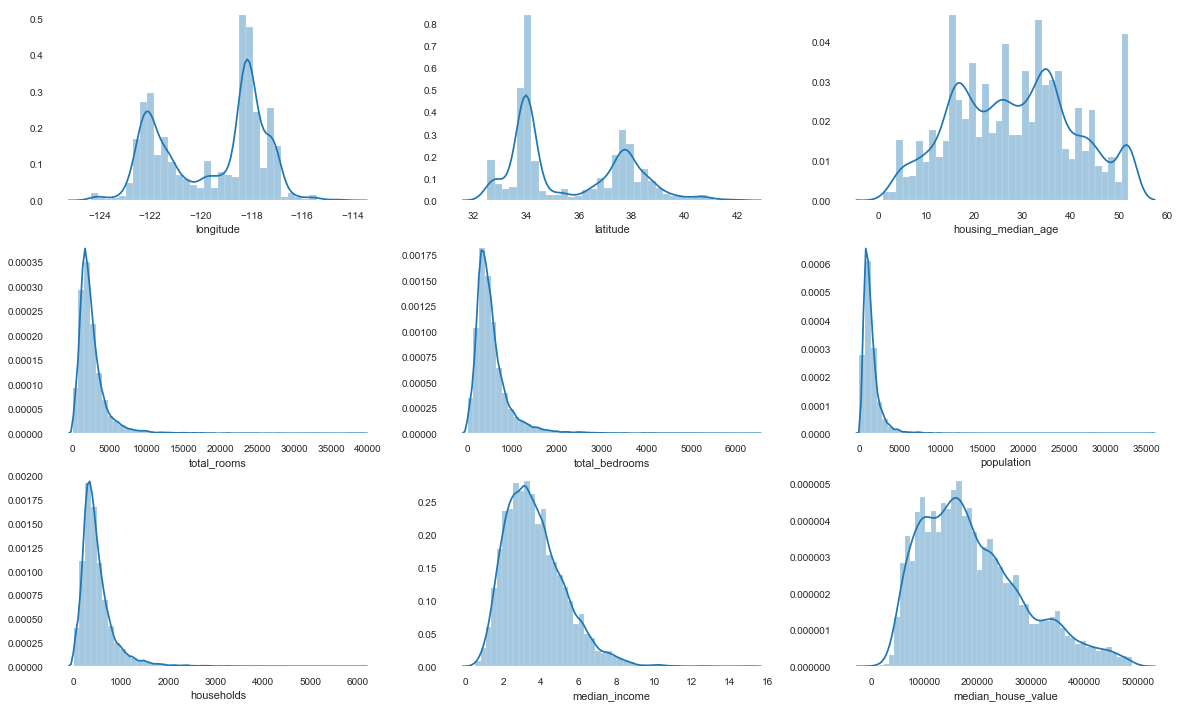

In [25]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data_cpy.iloc[:,:9].columns:
    plt.subplot(6, 3, j+1)
    j += 1
    sns.distplot(data_cpy[i])

In [26]:
data_cpy.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [27]:
X = data_cpy.drop('ocean_proximity', axis=1)

In [28]:
X.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924085,-0.101770,0.044617,0.070019,0.101328,0.056198,-0.009829,-0.046240
latitude,-0.924085,1.000000,0.006147,-0.033674,-0.068052,-0.113896,-0.073306,-0.077162,-0.149483
housing_median_age,-0.101770,0.006147,1.000000,-0.372530,-0.326362,-0.294927,-0.310074,-0.196945,0.063295
total_rooms,0.044617,-0.033674,-0.372530,1.000000,0.930970,0.859607,0.921142,0.225131,0.145735
total_bedrooms,0.070019,-0.068052,-0.326362,0.930970,1.000000,0.875277,0.973945,0.022943,0.076053
population,0.101328,-0.113896,-0.294927,0.859607,0.875277,1.000000,0.909112,0.043926,0.015378
households,0.056198,-0.073306,-0.310074,0.921142,0.973945,0.909112,1.000000,0.047317,0.097021
median_income,-0.009829,-0.077162,-0.196945,0.225131,0.022943,0.043926,0.047317,1.000000,0.645032
median_house_value,-0.046240,-0.149483,0.063295,0.145735,0.076053,0.015378,0.097021,0.645032,1.000000


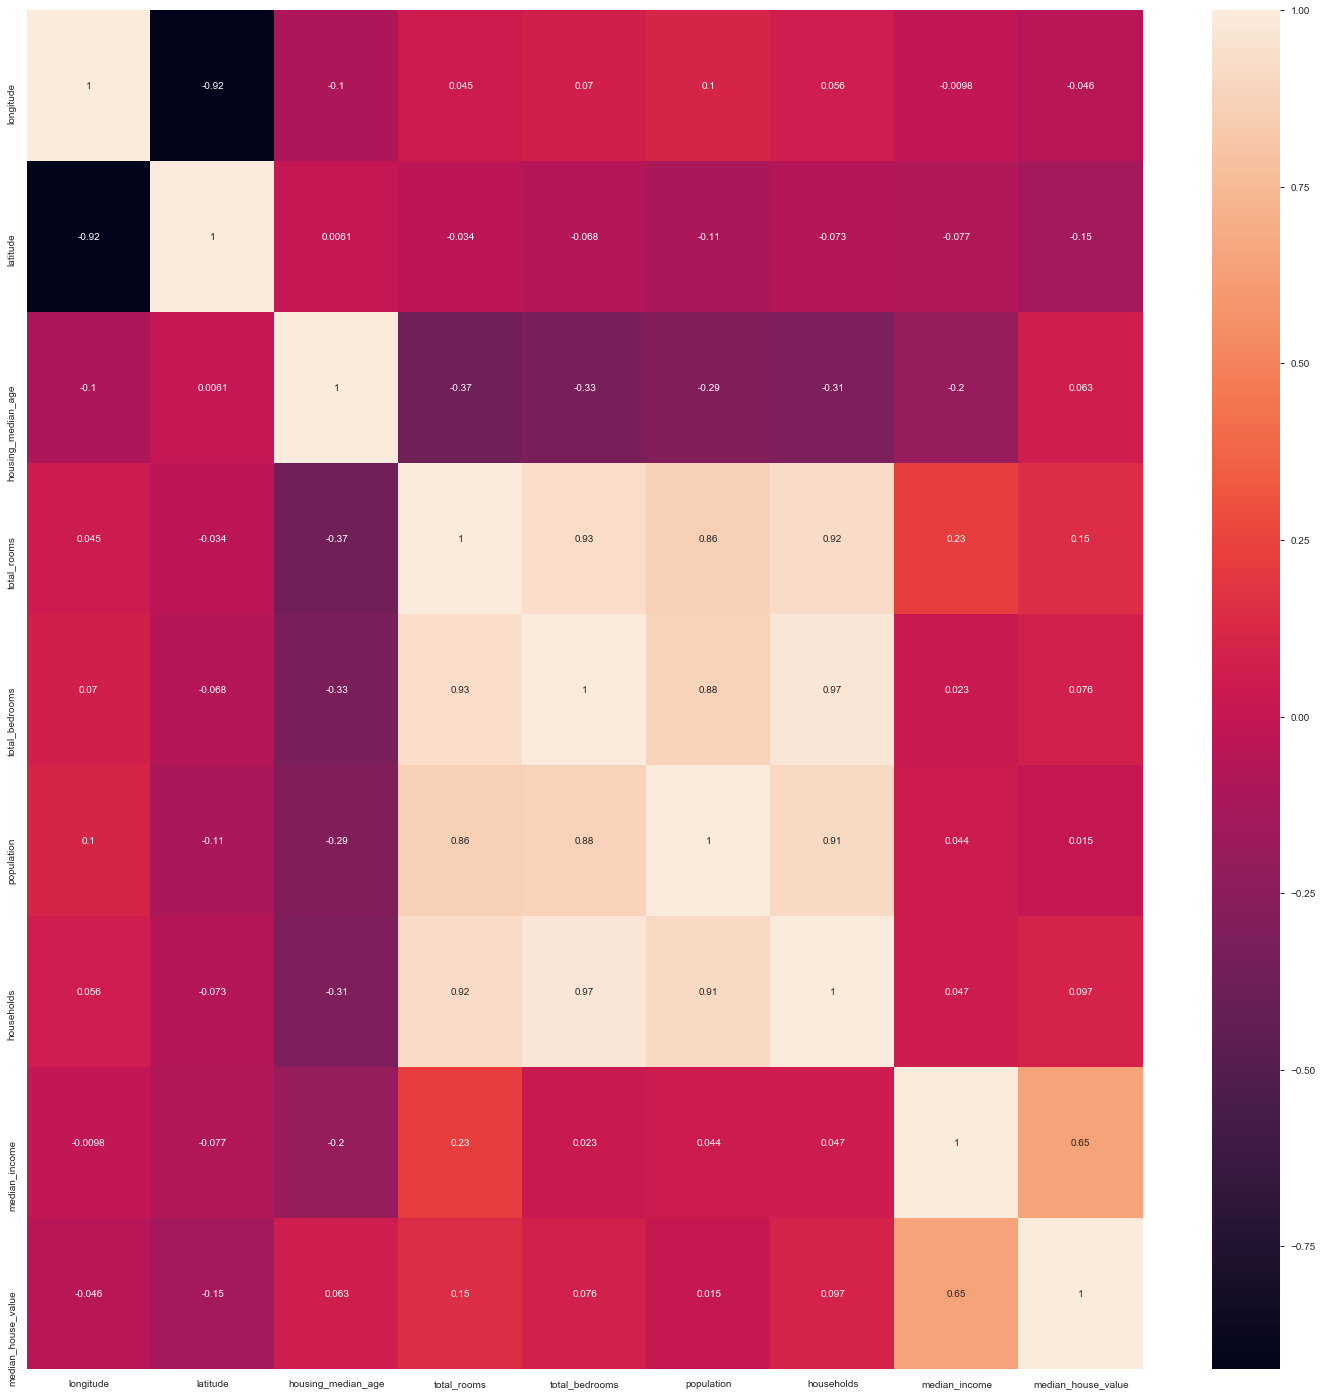

In [29]:
fig = plt.figure(figsize = (25, 25))
sns.heatmap(X.corr(), annot=True)

In [53]:
# X = X.drop('total_rooms',axis=1)

In [54]:
# fig = plt.figure(figsize = (25, 25))
# sns.heatmap(X.corr(), annot=True)

In [32]:
Y = data_cpy['ocean_proximity']

In [33]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
#feature selection

In [34]:
# bestfeatures = SelectKBest(score_func=chi2, k=6)

In [35]:
# X = X.drop('longitude', axis=1)

In [36]:
# fit = bestfeatures.fit(X,Y)

In [37]:
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)

In [38]:
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']

In [39]:
# featureScores

In [40]:
# print(featureScores.nlargest(7,'Score'))

In [41]:
# X.columns

In [42]:
data_cpy.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [43]:
data_cpy['x_cordinate'] = np.cos(data_cpy['latitude']) * np.cos(data_cpy['longitude'])

In [45]:
data_cpy['y_cordinate'] = np.cos(data_cpy['latitude']) * np.sin(data_cpy['longitude'])

In [47]:
data_cpy['z_cordinate'] = np.sin(data_cpy['latitude'])

In [49]:
data_cpy = data_cpy.drop(['longitude','latitude'], axis=1)

In [50]:
data_cpy

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,x_cordinate,y_cordinate,z_cordinate
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-0.942013,-0.283278,0.179903
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-0.942380,-0.293696,0.160195
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-0.949556,-0.275223,0.150316
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-0.952261,-0.265714,0.150316
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-0.952261,-0.265714,0.150316
...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.028830,0.206547,0.978012
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.055848,0.211055,0.975877
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.042317,0.153689,0.987213
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.057449,0.148697,0.987213


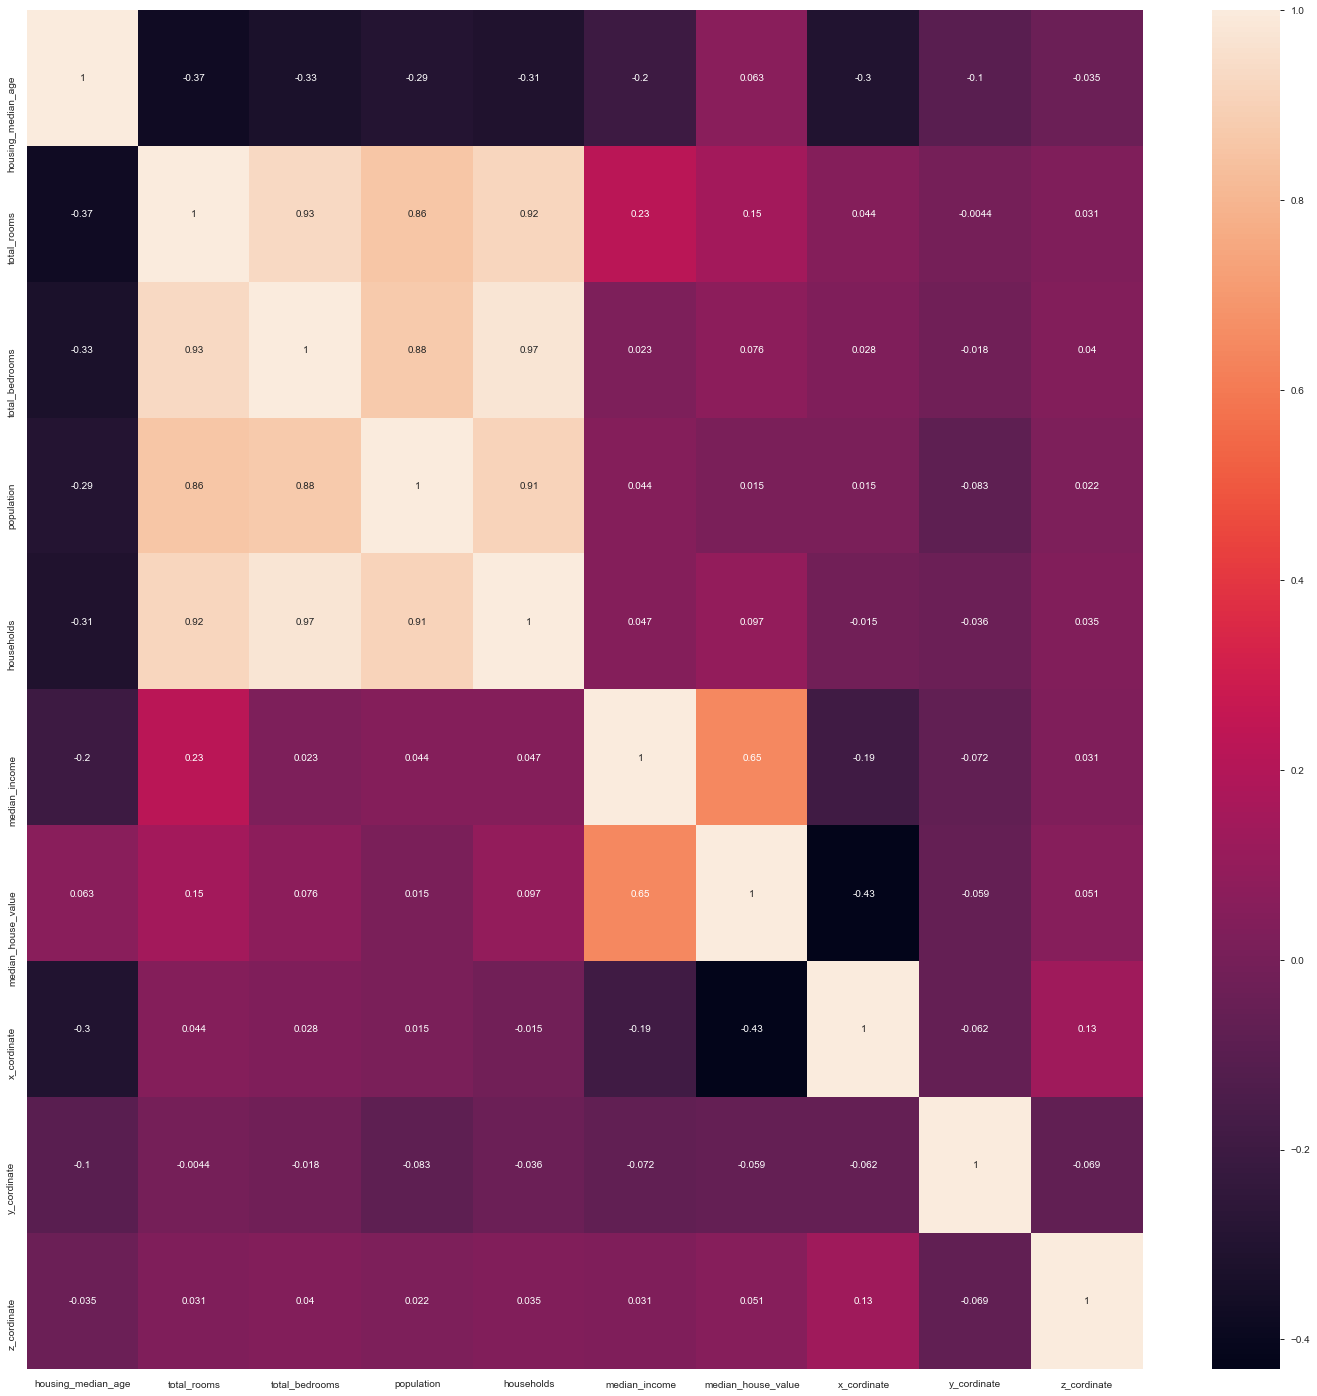

In [51]:
fig = plt.figure(figsize = (25, 25))
sns.heatmap(data_cpy.corr(), annot=True)

In [52]:
data_cpy.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,x_cordinate,y_cordinate,z_cordinate
housing_median_age,1.000000,-0.372530,-0.326362,-0.294927,-0.310074,-0.196945,0.063295,-0.304911,-0.100221,-0.034833
total_rooms,-0.372530,1.000000,0.930970,0.859607,0.921142,0.225131,0.145735,0.044207,-0.004378,0.031263
total_bedrooms,-0.326362,0.930970,1.000000,0.875277,0.973945,0.022943,0.076053,0.028456,-0.017947,0.040315
population,-0.294927,0.859607,0.875277,1.000000,0.909112,0.043926,0.015378,0.014636,-0.083266,0.021622
households,-0.310074,0.921142,0.973945,0.909112,1.000000,0.047317,0.097021,-0.015058,-0.036081,0.034929
median_income,-0.196945,0.225131,0.022943,0.043926,0.047317,1.000000,0.645032,-0.187812,-0.072068,0.031498
median_house_value,0.063295,0.145735,0.076053,0.015378,0.097021,0.645032,1.000000,-0.431432,-0.059333,0.050501
x_cordinate,-0.304911,0.044207,0.028456,0.014636,-0.015058,-0.187812,-0.431432,1.000000,-0.061785,0.134313
y_cordinate,-0.100221,-0.004378,-0.017947,-0.083266,-0.036081,-0.072068,-0.059333,-0.061785,1.000000,-0.069342
z_cordinate,-0.034833,0.031263,0.040315,0.021622,0.034929,0.031498,0.050501,0.134313,-0.069342,1.000000


In [55]:
from sklearn.ensemble import ExtraTreesClassifier

In [56]:
model = ExtraTreesClassifier()

In [57]:
X = data_cpy.drop('ocean_proximity', axis=1)
Y = data_cpy['ocean_proximity']

In [58]:
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [59]:
print(model.feature_importances_)

[0.05430093 0.02427641 0.02110523 0.02613434 0.02265762 0.03447776
 0.13347975 0.27631745 0.23032638 0.17692413]


In [60]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances

housing_median_age    0.054301
total_rooms           0.024276
total_bedrooms        0.021105
population            0.026134
households            0.022658
median_income         0.034478
median_house_value    0.133480
x_cordinate           0.276317
y_cordinate           0.230326
z_cordinate           0.176924
dtype: float64

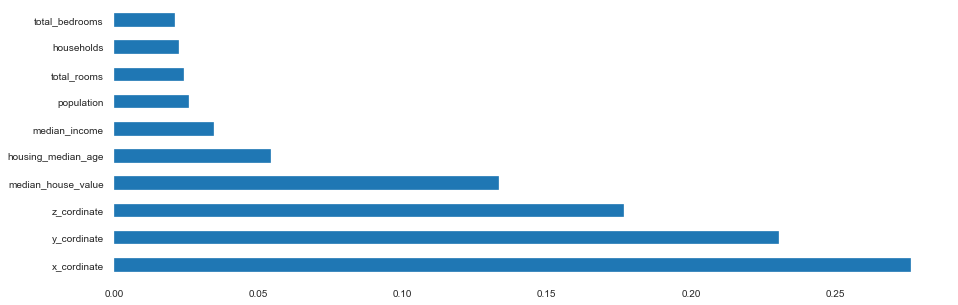

In [69]:
fig = plt.figure(figsize = (15, 5))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [70]:
X.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', 'x_cordinate',
       'y_cordinate', 'z_cordinate'],
      dtype='object')

In [71]:
X = X.drop(['total_rooms','households'], axis=1)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split

In [74]:
param_grid = {
    'n_estimators': [20,50,100,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['gini', 'entropy'],
    'max_leaf_nodes':[2,4,3],
}

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size =0.25,random_state=10)

In [78]:
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid,cv=3,verbose=3,n_jobs=-1)


In [79]:
grid.fit(X,Y)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   35.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [80]:
grid.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'max_leaf_nodes': 4,
 'n_estimators': 20}

In [82]:
random_forest = RandomForestClassifier(criterion='entropy',max_features='sqrt',max_leaf_nodes=4,n_estimators=20)

In [84]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=4, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
random_forest.score(X_test,y_test)

0.7307221542227662

In [91]:
y_pred = random_forest.predict(X_test)

In [109]:
from sklearn.metrics import classification_report, recall_score,accuracy_score,precision_score

In [99]:
# classification_report(y_test,y_pred)

In [116]:
recall_score(y_test,y_pred,average='micro')

0.7307221542227662

In [107]:
accuracy_score(y_test,y_pred)

0.7307221542227662

In [115]:
precision_score(y_test,y_pred,average='micro')

0.7307221542227662

In [121]:
!pip install xgboost

In [123]:
import xgboost as xgb

In [125]:
xgboost = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

In [126]:
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [128]:
xgboost.score(X_train,y_train)

0.9997960016319869

In [129]:
xgboost.score(X_test,y_test)

0.9663402692778458

In [133]:
y_pred = xgboost.predict(X_test)

In [134]:
accuracy_score(y_test,y_pred)

0.9663402692778458

In [138]:
recall_score(y_test,y_pred,average='weighted')

0.9663402692778458

In [139]:
from sklearn.svm import SVC

In [140]:
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001]}

In [141]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [142]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\Demon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 27.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [143]:
grid.best_params_

{'C': 10, 'gamma': 0.001}

In [147]:
svm = SVC(C=10,gamma=0.001)

In [148]:
svm.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [149]:
svm.score(X_test,y_test)

0.4473684210526316

In [150]:
accuracy_score(y_test,svm.predict(X_test))

0.4473684210526316